In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

BUYS DATSET FILE DESCRIPTION

======================================

The file yoochoose-buys.dat comprising the buy events of the users over the items.
Each record/line in the file has the following fields: Session ID, Timestamp, Item ID, Price, Quantity

- Session ID - the id of the session. In one session there are one or many buying events. Could be represented as an integer number.
- Timestamp - the time when the buy occurred. Format of YYYY-MM-DDThh:mm:ss.SSSZ
- Item ID – the unique identifier of item that has been bought. Could be represented as an integer number.
- Price – the price of the item. Could be represented as an integer number.
- Quantity – the quantity in this buying.  Could be represented as an integer number.

CLICKS DATASET FILE DESCRIPTION

=====================================

The file yoochoose-clicks.dat comprising the clicks of the users over the items.
Each record/line in the file has the following fields/format: Session ID, Timestamp, Item ID, Category
- Session ID – the id of the session. In one session there are one or many clicks. Could be represented as an integer number.
- Timestamp – the time when the click occurred. Format of YYYY-MM-DDThh:mm:ss.SSSZ
- Item ID – the unique identifier of the item that has been clicked. Could be represented as an integer number.
- Category – the context of the click. The value "S" indicates a special offer, "0" indicates  a missing value, a number between 1 to 12 indicates a real category identifier,

 any other number indicates a brand. E.g. if an item has been clicked in the context of a promotion or special offer then the value will be "S", if the context was a brand i.e BOSCH,
 then the value will be an 8-10 digits number. If the item has been clicked under regular category, i.e. sport, then the value will be a number between 1 to 12. 

In [26]:
buy_dataPath = "./yoochoose-buys.dat"
click_dataPath = "./yoochoose-clicks.dat"
test_dataPath = "./yoochoose-test.dat"
# ! head -n 10 $click_dataPath

# 读取click数据

In [3]:
click_df = pd.read_csv(click_dataPath, sep=',', header = None, names = ["session_id", "timeStamp", "itemID", "category"])

/home/zhaoping/anaconda3/envs/recomSys/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# click_df.columns = ["session_id", "timeStamp", "itemID", "price", "quantity"] # buy
# click_df.columns = ["session_id", "timeStamp", "itemID", "category"] # click
click_df.sort_values(by = "timeStamp", ascending=True, inplace=True)
click_df.reset_index(inplace=True, drop=True)
click_df.head(3)

,session_id,timeStamp,itemID,category
0,351646,2014-04-01T03:00:00.124Z,214717005,0
1,389654,2014-04-01T03:00:00.567Z,214826705,0
2,263073,2014-04-01T03:00:10.087Z,214716982,0


In [5]:
click_df.isnull().sum()

session_id    0
timeStamp     0
itemID        0
category      0
dtype: int64

In [6]:
click_df.dtypes

session_id     int64
timeStamp     object
itemID         int64
category      object
dtype: object

In [7]:
click_session_group = click_df.groupby('session_id').size()

print(click_df.nunique())
print(click_df.shape)
print("Minimum Session Length: {:d}".format(click_session_group.min()))
print("Maximum Session Length: {:d}".format(click_session_group.max()))
print("Average Session Length: {:.2f}".format(click_session_group.mean()))

session_id     9249729
timeStamp     32937845
itemID           52739
category           340
dtype: int64
(33003944, 4)
Minimum Session Length: 1
Maximum Session Length: 200
Average Session Length: 3.57


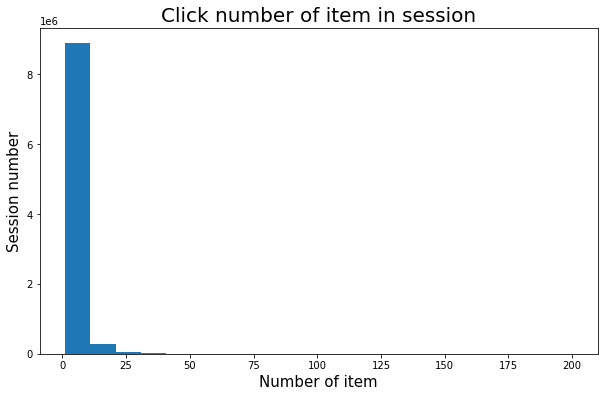

In [14]:
plt.figure(figsize=(10,5))
plt.hist(click_df.session_id.value_counts(), bins=20)
plt.title("Number of click item in session", fontsize=20)
plt.xlabel("Number of item", fontsize=15)
plt.ylabel("Session number", fontsize=15)
plt.show()

# 读取buy数据

In [18]:
buy_df = pd.read_csv(buy_dataPath, sep=',', header = None, names = ["session_id", "timeStamp", "itemID", "price", "quantity"])

In [19]:
# buy_df.columns = ["session_id", "timeStamp", "itemID", "price", "quantity"] # buy
# buy_df.columns = ["session_id", "timeStamp", "itemID", "category"] # click
buy_df.sort_values(by = "timeStamp", ascending=True, inplace=True)
buy_df.reset_index(inplace=True, drop=True)
buy_df.head(3)

,session_id,timeStamp,itemID,price,quantity
0,263073,2014-04-01T03:05:31.743Z,214716982,2617,1
1,466654,2014-04-01T03:21:30.255Z,214820812,313,1
2,466654,2014-04-01T03:21:30.271Z,214584907,4711,1


In [21]:
buy_df.isnull().sum()

session_id    0
timeStamp     0
itemID        0
price         0
quantity      0
dtype: int64

In [22]:
buy_df.isnull().sum()

session_id    0
timeStamp     0
itemID        0
price         0
quantity      0
dtype: int64

In [23]:
buy_session_group = buy_df.groupby('session_id').size()

print(buy_df.nunique())
print(buy_df.shape)
print("Minimum Session Length: {:d}".format(buy_session_group.min()))
print("Maximum Session Length: {:d}".format(buy_session_group.max()))
print("Average Session Length: {:.2f}".format(buy_session_group.mean()))

session_id     509696
timeStamp     1136477
itemID          19949
price             735
quantity           28
dtype: int64
(1150753, 5)
Minimum Session Length: 1
Maximum Session Length: 144
Average Session Length: 2.26


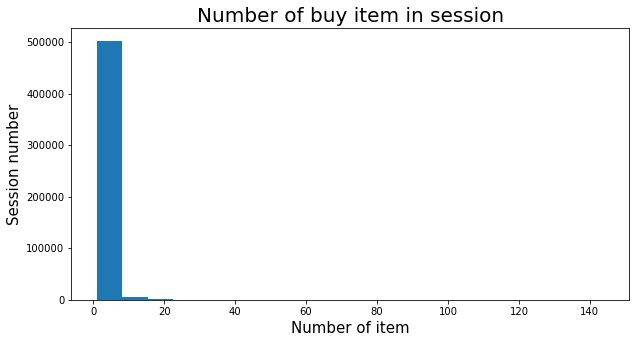

In [25]:
plt.figure(figsize=(10,5))
plt.hist(buy_df.session_id.value_counts(), bins=20)
plt.title("Number of buy item in session", fontsize=20)
plt.xlabel("Number of item", fontsize=15)
plt.ylabel("Session number", fontsize=15)
plt.show()

# 读取test数据

In [27]:
test_df = pd.read_csv(test_dataPath, sep=',', header = None, names = ["session_id", "timeStamp", "itemID", "category"])
test_df.head(3)

/home/zhaoping/anaconda3/envs/recomSys/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,session_id,timeStamp,itemID,category
0,5,2014-04-07T17:13:46.713Z,214530776,0
1,5,2014-04-07T17:20:56.973Z,214530776,0
2,5,2014-04-07T17:21:19.602Z,214530776,0
